# This file is for training and testing model
The fastai courses is using fastai V0.7 and this script is using fastai V1.0

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
torch.cuda.is_available() and torch.backends.cudnn.enabled

True

In [3]:
os.getcwd()

'/home/dicheng'

In [4]:
PATH = os.path.join(os.getcwd(),'Pictures','fastaidata')

Total time: 00:44
epoch  train_loss  valid_loss  accuracy
1      0.438344    0.024200    1.000000  (00:19)
2      0.247847    0.018939    0.991870  (00:12)
3      0.170112    0.018065    0.991870  (00:12)



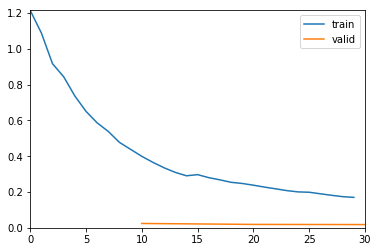

In [5]:
'''I modify the model and parameters a little bit'''
data = ImageDataBunch.from_folder(PATH, ds_tfms = get_transforms(), size =224)
learn = create_cnn(data, models.resnet34, metrics=accuracy, callback_fns=ShowGraph)
learn.fit_one_cycle(3)

most confidence cars with probs

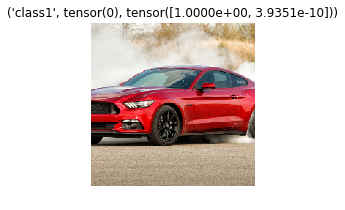

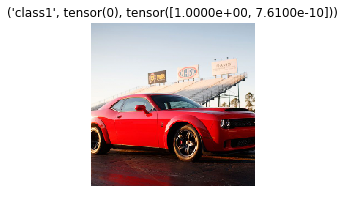

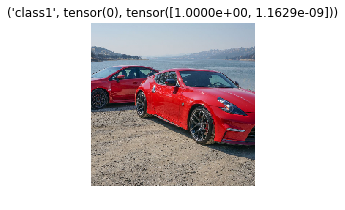

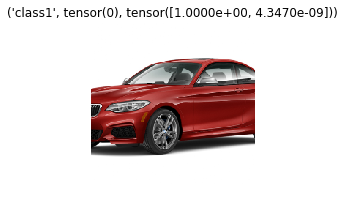

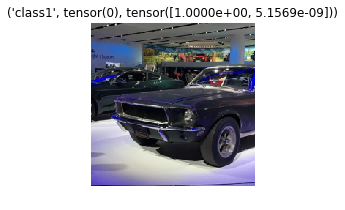

In [41]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(data, preds, y, losses)
i = 0
class1 = {}
while True:
    try:
        im,cl = interp.data.valid_ds[i]
        if int(cl) == 0 :
            class1[im] = float(learn.predict(im)[2][1])
        i += 1
    except:
        break
f = sorted(class1.items(), key = lambda item:item[1])
for i in range(0,5):
    f[i][0].show(title = learn.predict(f[i][0]))

most confidence bikes

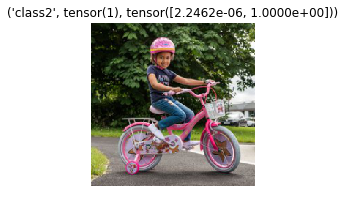

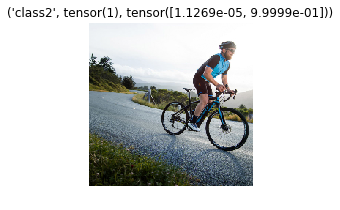

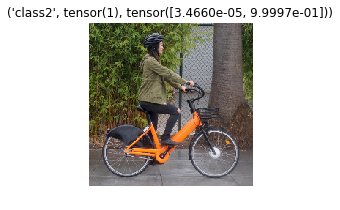

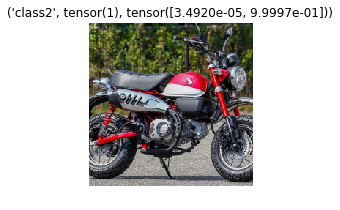

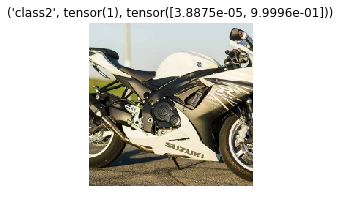

In [22]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(data, preds, y, losses)
i = 0
class2 = {}
while True:
    try:
        im,cl = interp.data.valid_ds[i]
        if int(cl) == 1 :
            class2[im] = float(learn.predict(im)[2][0])
        i += 1
    except:
        break
f = sorted(class2.items(), key = lambda item:item[1])
for i in range(0,5):
    f[i][0].show(title = learn.predict(f[i][0]))

most uncertain items

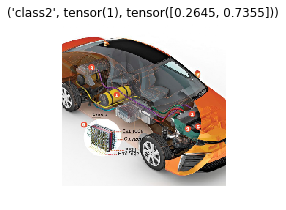

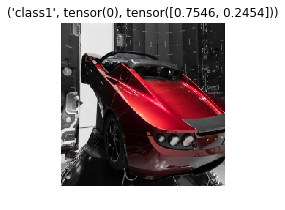

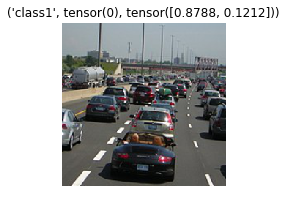

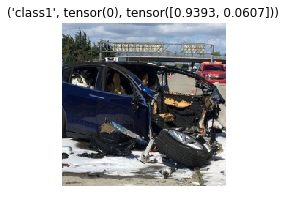

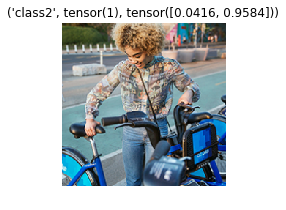

In [21]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(data, preds, y, losses)
i = 0
uncertain = {}
while True:
    try:
        im,cl = interp.data.valid_ds[i]
        uncertain[im] = abs(0.5 - float(learn.predict(im)[2][1]))
        i += 1
    except:
        break
f = sorted(uncertain.items(), key = lambda item:item[1])
for i in range(0,5):
    f[i][0].show(title = learn.predict(f[i][0]))

The confusion matrix shows that the model only makes one wrong

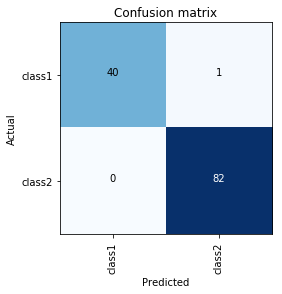

In [14]:
interp.plot_confusion_matrix()

The car with greatest loss is the wrong one.

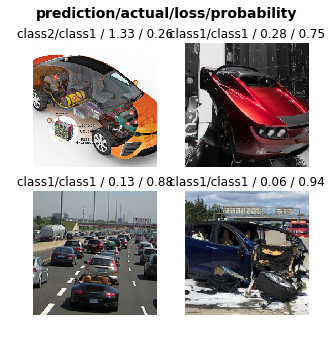

In [34]:
interp.plot_top_losses(k = 4, figsize=(5,5))

I don't make graphs for most confidence wrong since the model only make one wrong. However, this is similar to the process for finding the most right and most uncertain one